In [1]:
import torch
torch.__version__

'2.0.1+cu118'

In [2]:
scalar = torch.tensor(7)
print(scalar) #Tensor
print(scalar.item())


tensor(7)
7


In [3]:
vector = torch.tensor([7,7])
print(vector)
print(vector.shape)

tensor([7, 7])
torch.Size([2])


In [4]:
#Errors in PyTorch:
#1. Shape Errors
#2. Device Errors
#3. Datatype Errors
matrix = torch.tensor([[7,8],[9,10]])
print(matrix)

tensor([[ 7,  8],
        [ 9, 10]])


In [5]:
#Creatre a random tensor
random_tensor = torch.rand(size=(3,4))
print(random_tensor)
print(random_tensor.dtype)

tensor([[0.3922, 0.7118, 0.5804, 0.5461],
        [0.6583, 0.3048, 0.6097, 0.3626],
        [0.7873, 0.6606, 0.1770, 0.7117]])
torch.float32


In [6]:
#Image Tensor -> [C,H,W]
image_tensor = torch.rand(size=(3,224,224))
print(image_tensor)

tensor([[[0.9851, 0.0996, 0.0099,  ..., 0.2144, 0.8967, 0.7435],
         [0.3336, 0.2943, 0.7586,  ..., 0.7052, 0.0327, 0.0485],
         [0.5127, 0.6547, 0.7760,  ..., 0.9182, 0.4524, 0.6124],
         ...,
         [0.1437, 0.8665, 0.0108,  ..., 0.8508, 0.8791, 0.7110],
         [0.2501, 0.5097, 0.3566,  ..., 0.3815, 0.9473, 0.7342],
         [0.5393, 0.5801, 0.9190,  ..., 0.0092, 0.8144, 0.1936]],

        [[0.9037, 0.9389, 0.5597,  ..., 0.5151, 0.5489, 0.4607],
         [0.7996, 0.6342, 0.7542,  ..., 0.3268, 0.6969, 0.5053],
         [0.0095, 0.9210, 0.4595,  ..., 0.1149, 0.1710, 0.1155],
         ...,
         [0.7236, 0.6823, 0.2699,  ..., 0.5575, 0.5516, 0.4154],
         [0.2500, 0.7706, 0.9112,  ..., 0.0033, 0.0068, 0.8262],
         [0.8214, 0.7661, 0.0775,  ..., 0.1685, 0.1128, 0.1476]],

        [[0.9931, 0.4425, 0.1405,  ..., 0.4323, 0.5506, 0.0068],
         [0.4931, 0.3563, 0.3185,  ..., 0.0428, 0.7224, 0.9693],
         [0.6041, 0.2114, 0.3546,  ..., 0.9877, 0.3725, 0.

In [7]:
#Create a range of values
range_tensor = torch.arange(start=0,end=10,step=2)
print(range_tensor)

tensor([0, 2, 4, 6, 8])


In [8]:
print("Shape: {range_tensor.shape}, Datatype: {range_tensor.dtype}, Device: {range_tensor.device}".format(range_tensor=range_tensor))

Shape: torch.Size([5]), Datatype: torch.int64, Device: cpu


In [9]:
#Squeeze
unsqueezed_tensor = torch.tensor([[1,2,3]])
print(unsqueezed_tensor)
print(unsqueezed_tensor.shape)

squeezed_tensor = torch.squeeze(unsqueezed_tensor)
print(squeezed_tensor)
print(squeezed_tensor.shape)

tensor([[1, 2, 3]])
torch.Size([1, 3])
tensor([1, 2, 3])
torch.Size([3])


In [10]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)


In [11]:
torch.cuda.is_available()

True

In [12]:
#Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [13]:
# 1. Env Checks
import torch
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    print("GPU: ",torch.cuda.get_device_name(0))
else:
    print("CPU")

GPU:  NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [14]:
#2. Loading the MNIST Dataset
from torchvision import datasets, transforms

transform = transforms.ToTensor() #[C,H,W] and values between 0 and 1
train_dataset = datasets.MNIST(
    root="../data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="../data",
    train=False,
    download=True,
    transform=transform
)

print(f"Train Dataset: {len(train_dataset)}, Test Dataset: {len(test_dataset)}")

Train Dataset: 60000, Test Dataset: 10000


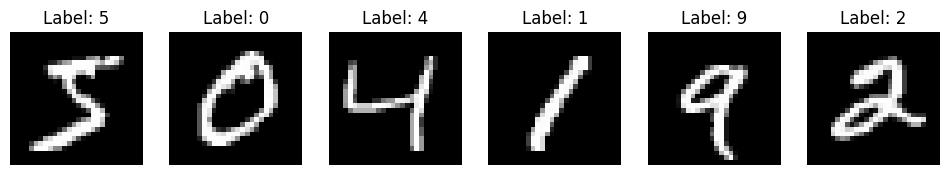

In [17]:
fig, ax = plt.subplots(1,6,figsize=(12,3))
for i in range(6):
    img, label = train_dataset[i]
    ax[i].imshow(img.squeeze(),cmap="gray")
    ax[i].set_title(f"Label: {label}")
    ax[i].axis("off")
plt.show()

In [21]:
#Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

#Use Dataloader
train_loader = DataLoader(train_dataset,batch_size= 1000,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size = 64,shuffle=False)



In [22]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.neural = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,128),nn.ReLU(),
        nn.Linear(128,64),nn.ReLU(),
        nn.Linear(64,10)
        )
    def forward(self,x):
        return self.neural(x)
    


In [23]:
model = MLP().to(device) #send model to GPU if available
print(model)

MLP(
  (neural): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [25]:
epochs = 3
train_losses = []
for epoch in range(epochs):
    #Training Loop
    #0. Set model to train mode
    model.train()
    total_loss = 0.0
    for X,y in train_loader:
        #Both X and y are on the same device
        X,y = X.to(device),y.to(device)
        #1. Forward Pass
        output = model(X)
        #2. Calculate Loss
        loss = loss_fn(output,y)
        #3. Optimizer zero grad
        optimizer.zero_grad()
        #4. Loss Backward
        loss.backward()
        #5. Optimizer step
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch: {epoch} | Train Loss: {avg_loss:.4f}")
    

Epoch: 0 | Train Loss: 1.0978
Epoch: 1 | Train Loss: 0.3288
Epoch: 2 | Train Loss: 0.2657


In [26]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 93.10%
